In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
file = "Populationdata.csv"
population_file = pd.read_csv(file,encoding = "ISO-8859-1")
population_file.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08,NaN
1,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,4.198307e+06,4.277802e+06,4.357746e+06,4.436804e+06,4.513246e+06,4.585777e+06,...,6.939534e+06,6.984096e+06,7.029022e+06,7.074129e+06,7.118888e+06,7.162679e+06,7.204948e+06,7.245472e+06,7.284294e+06,NaN
2,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,9.140176e+07,9.223274e+07,9.300950e+07,9.384002e+07,9.471580e+07,9.544099e+07,...,1.048005e+08,1.044214e+08,1.041740e+08,1.039353e+08,1.037137e+08,1.034962e+08,1.032578e+08,1.029943e+08,1.027353e+08,NaN
3,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.792874e+08,1.002524e+09,1.026587e+09,1.051415e+09,1.077037e+09,1.103433e+09,...,2.865440e+09,2.909411e+09,2.953406e+09,2.997066e+09,3.040701e+09,3.084236e+09,3.127579e+09,3.170658e+09,3.213428e+09,NaN
4,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.040034e+09,1.043597e+09,1.058046e+09,1.083797e+09,1.109192e+09,1.135651e+09,...,2.192343e+09,2.207155e+09,2.221935e+09,2.237073e+09,2.252293e+09,2.267717e+09,2.283073e+09,2.298707e+09,2.314368e+09,NaN


In [3]:
population_file_df = population_file.loc[:,['Country Name','Country Code','Indicator Name','Indicator Code','2011','2012','2013','2014','2015','2016','2017']]
population_file_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"Population, total",SP.POP.TOTL,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08
1,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,7.029022e+06,7.074129e+06,7.118888e+06,7.162679e+06,7.204948e+06,7.245472e+06,7.284294e+06
2,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1.041740e+08,1.039353e+08,1.037137e+08,1.034962e+08,1.032578e+08,1.029943e+08,1.027353e+08
3,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,2.953406e+09,2.997066e+09,3.040701e+09,3.084236e+09,3.127579e+09,3.170658e+09,3.213428e+09
4,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,2.221935e+09,2.237073e+09,2.252293e+09,2.267717e+09,2.283073e+09,2.298707e+09,2.314368e+09


In [4]:
file2 = "WDI_Country_Code_and_Names.csv"
country_file_df = pd.read_csv(file2,encoding = "ISO-8859-1")
country_file_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code
0,ABW,Aruba,Aruba,Aruba,AW
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF
2,AGO,Angola,Angola,People's Republic of Angola,AO
3,ALB,Albania,Albania,Republic of Albania,AL
4,AND,Andorra,Andorra,Principality of Andorra,AD


In [5]:
file3 = "PM25Data.csv"
pm25_file_df = pd.read_csv(file3,encoding = "ISO-8859-1")
pm25_file_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,52.786906,53.417058,54.155131,52.664971,60.474030,58.827049,58.724859
1,Caribbean small states,CSS,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,23.587435,22.162120,21.445556,19.960508,20.085207,19.101736,19.011852
2,Central Europe and the Baltics,CEB,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,21.909830,20.203625,19.225376,18.609196,18.994108,17.641086,17.633431
3,Early-demographic dividend,EAR,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,64.725373,60.288718,61.311395,59.931260,60.551642,59.802363,60.293434
4,East Asia & Pacific,EAS,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,52.413068,48.054180,48.825358,44.849224,44.219628,39.522185,39.752706


In [6]:
file4 = "gdpdata.csv"
gdp_file = pd.read_csv(file4,encoding = "ISO-8859-1")
gdp_file.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.010000e+12,2.110000e+12,2.190000e+12,2.330000e+12,2.410000e+12,2.470000e+12,2.550000e+12,2.630000e+12,2.650000e+12,NaN
1,Caribbean small states,CSS,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.235886e+10,6.326893e+10,6.396736e+10,6.481015e+10,6.538207e+10,6.581300e+10,6.650488e+10,6.526628e+10,6.539155e+10,NaN
2,Central Europe and the Baltics,CEB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.290000e+12,1.310000e+12,1.350000e+12,1.360000e+12,1.380000e+12,1.420000e+12,1.480000e+12,1.530000e+12,1.600000e+12,NaN
3,Early-demographic dividend,EAR,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.120000e+12,1.160000e+12,1.210000e+12,1.280000e+12,1.380000e+12,1.460000e+12,...,8.050000e+12,8.550000e+12,8.970000e+12,9.350000e+12,9.750000e+12,1.010000e+13,1.060000e+13,1.110000e+13,1.170000e+13,NaN
4,East Asia & Pacific,EAS,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.340000e+12,1.410000e+12,1.500000e+12,1.620000e+12,1.790000e+12,1.910000e+12,...,1.580000e+13,1.690000e+13,1.770000e+13,1.860000e+13,1.940000e+13,2.020000e+13,2.110000e+13,2.190000e+13,2.290000e+13,NaN


In [7]:
gdp_file_df = gdp_file.loc[:,['Country Name','Country Code','Indicator Name','Indicator Code','2011','2012','2013','2014','2015','2016','2017']]
gdp_file_df = gdp_file_df.rename(columns = {'2011':'2011_gdp','2012':'2012_gdp','2013':'2013_gdp','2014':'2014_gdp','2015':'2015_gdp','2016':'2016_gdp','2017':'2017_gdp'})
gdp_file_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp
0,Arab World,ARB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,2.190000e+12,2.330000e+12,2.410000e+12,2.470000e+12,2.550000e+12,2.630000e+12,2.650000e+12
1,Caribbean small states,CSS,GDP (constant 2010 US$),NY.GDP.MKTP.KD,6.396736e+10,6.481015e+10,6.538207e+10,6.581300e+10,6.650488e+10,6.526628e+10,6.539155e+10
2,Central Europe and the Baltics,CEB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.350000e+12,1.360000e+12,1.380000e+12,1.420000e+12,1.480000e+12,1.530000e+12,1.600000e+12
3,Early-demographic dividend,EAR,GDP (constant 2010 US$),NY.GDP.MKTP.KD,8.970000e+12,9.350000e+12,9.750000e+12,1.010000e+13,1.060000e+13,1.110000e+13,1.170000e+13
4,East Asia & Pacific,EAS,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.770000e+13,1.860000e+13,1.940000e+13,2.020000e+13,2.110000e+13,2.190000e+13,2.290000e+13


In [8]:
merge_table = pd.merge(population_file_df, pm25_file_df, on="Country Code", how="inner",suffixes=("_population", "_pm25"))
merge_table

,Country Name_population,Country Code,Indicator Name_population,Indicator Code_population,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,...,Country Name_pm25,Indicator Name_pm25,Indicator Code_pm25,2011_pm25,2012_pm25,2013_pm25,2014_pm25,2015_pm25,2016_pm25,2017_pm25
0,Arab World,ARB,"Population, total",SP.POP.TOTL,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,...,Arab World,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,52.786906,53.417058,54.155131,52.664971,60.474030,58.827049,58.724859
1,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,7.029022e+06,7.074129e+06,7.118888e+06,7.162679e+06,7.204948e+06,7.245472e+06,...,Caribbean small states,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,23.587435,22.162120,21.445556,19.960508,20.085207,19.101736,19.011852
2,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1.041740e+08,1.039353e+08,1.037137e+08,1.034962e+08,1.032578e+08,1.029943e+08,...,Central Europe and the Baltics,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,21.909830,20.203625,19.225376,18.609196,18.994108,17.641086,17.633431
3,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,2.953406e+09,2.997066e+09,3.040701e+09,3.084236e+09,3.127579e+09,3.170658e+09,...,Early-demographic dividend,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,64.725373,60.288718,61.311395,59.931260,60.551642,59.802363,60.293434
4,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,2.221935e+09,2.237073e+09,2.252293e+09,2.267717e+09,2.283073e+09,2.298707e+09,...,East Asia & Pacific,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,52.413068,48.054180,48.825358,44.849224,44.219628,39.522185,39.752706
5,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,1.980304e+09,1.994651e+09,2.009173e+09,2.023837e+09,2.038411e+09,2.053299e+09,...,East Asia & Pacific (excluding high income),"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,56.379826,51.637194,52.438302,48.119957,47.373583,42.301130,42.542375
6,East Asia & Pacific (IDA & IBRD countries),TEA,"Population, total",SP.POP.TOTL,1.955547e+09,1.969763e+09,1.984153e+09,1.998686e+09,2.013133e+09,2.027896e+09,...,East Asia & Pacific (IDA & IBRD countries),"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,56.602057,51.830409,52.632086,48.282778,47.499451,42.433841,42.674657
7,Euro area,EMU,"Population, total",SP.POP.TOTL,3.354196e+08,3.361592e+08,3.373021e+08,3.384663e+08,3.395335e+08,3.406169e+08,...,Euro area,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,15.366386,14.157501,13.788142,13.224546,13.430554,12.466072,12.524514
8,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,8.909708e+08,8.945625e+08,8.987997e+08,9.031156e+08,9.074328e+08,9.116940e+08,...,Europe & Central Asia,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,20.579230,19.502547,19.080265,18.389372,18.995496,18.001971,18.072785
9,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,4.011234e+08,4.033436e+08,4.058129e+08,4.082640e+08,4.107790e+08,4.132431e+08,...,Europe & Central Asia (excluding high income),"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,26.384397,25.525428,25.101551,24.273295,25.400278,24.307597,24.419995


In [9]:
merge_table_1part2 = pd.merge(merge_table, gdp_file_df, on="Country Code", how="inner")
merge_table_1part2

,Country Name_population,Country Code,Indicator Name_population,Indicator Code_population,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,...,Country Name,Indicator Name,Indicator Code,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp
0,Arab World,ARB,"Population, total",SP.POP.TOTL,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,...,Arab World,GDP (constant 2010 US$),NY.GDP.MKTP.KD,2.190000e+12,2.330000e+12,2.410000e+12,2.470000e+12,2.550000e+12,2.630000e+12,2.650000e+12
1,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,7.029022e+06,7.074129e+06,7.118888e+06,7.162679e+06,7.204948e+06,7.245472e+06,...,Caribbean small states,GDP (constant 2010 US$),NY.GDP.MKTP.KD,6.396736e+10,6.481015e+10,6.538207e+10,6.581300e+10,6.650488e+10,6.526628e+10,6.539155e+10
2,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1.041740e+08,1.039353e+08,1.037137e+08,1.034962e+08,1.032578e+08,1.029943e+08,...,Central Europe and the Baltics,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.350000e+12,1.360000e+12,1.380000e+12,1.420000e+12,1.480000e+12,1.530000e+12,1.600000e+12
3,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,2.953406e+09,2.997066e+09,3.040701e+09,3.084236e+09,3.127579e+09,3.170658e+09,...,Early-demographic dividend,GDP (constant 2010 US$),NY.GDP.MKTP.KD,8.970000e+12,9.350000e+12,9.750000e+12,1.010000e+13,1.060000e+13,1.110000e+13,1.170000e+13
4,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,2.221935e+09,2.237073e+09,2.252293e+09,2.267717e+09,2.283073e+09,2.298707e+09,...,East Asia & Pacific,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.770000e+13,1.860000e+13,1.940000e+13,2.020000e+13,2.110000e+13,2.190000e+13,2.290000e+13
5,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,1.980304e+09,1.994651e+09,2.009173e+09,2.023837e+09,2.038411e+09,2.053299e+09,...,East Asia & Pacific (excluding high income),GDP (constant 2010 US$),NY.GDP.MKTP.KD,8.550000e+12,9.190000e+12,9.850000e+12,1.050000e+13,1.120000e+13,1.190000e+13,1.270000e+13
6,East Asia & Pacific (IDA & IBRD countries),TEA,"Population, total",SP.POP.TOTL,1.955547e+09,1.969763e+09,1.984153e+09,1.998686e+09,2.013133e+09,2.027896e+09,...,East Asia & Pacific (IDA & IBRD countries),GDP (constant 2010 US$),NY.GDP.MKTP.KD,8.530000e+12,9.170000e+12,9.830000e+12,1.050000e+13,1.120000e+13,1.190000e+13,1.270000e+13
7,Euro area,EMU,"Population, total",SP.POP.TOTL,3.354196e+08,3.361592e+08,3.373021e+08,3.384663e+08,3.395335e+08,3.406169e+08,...,Euro area,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.290000e+13,1.270000e+13,1.270000e+13,1.290000e+13,1.320000e+13,1.340000e+13,1.370000e+13
8,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,8.909708e+08,8.945625e+08,8.987997e+08,9.031156e+08,9.074328e+08,9.116940e+08,...,Europe & Central Asia,GDP (constant 2010 US$),NY.GDP.MKTP.KD,2.150000e+13,2.150000e+13,2.170000e+13,2.210000e+13,2.260000e+13,2.300000e+13,2.360000e+13
9,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,4.011234e+08,4.033436e+08,4.058129e+08,4.082640e+08,4.107790e+08,4.132431e+08,...,Europe & Central Asia (excluding high income),GDP (constant 2010 US$),NY.GDP.MKTP.KD,3.300000e+12,3.420000e+12,3.560000e+12,3.640000e+12,3.660000e+12,3.710000e+12,3.860000e+12


In [10]:
merge_table2 = pd.merge(merge_table_1part2,country_file_df,on="Country Code",how='inner')
merge_table2

,Country Name_population,Country Code,Indicator Name_population,Indicator Code_population,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,...,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp,Short Name,Table Name,Long Name,2-alpha code
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF
1,Albania,ALB,"Population, total",SP.POP.TOTL,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,...,1.240478e+10,1.252882e+10,1.275058e+10,1.303365e+10,1.347027e+10,1.398693e+10,Albania,Albania,Republic of Albania,AL
2,Algeria,DZA,"Population, total",SP.POP.TOTL,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,...,1.710000e+11,1.760000e+11,1.830000e+11,1.900000e+11,1.960000e+11,1.990000e+11,Algeria,Algeria,People's Democratic Republic of Algeria,DZ
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0,...,5.523172e+08,5.370925e+08,5.421674e+08,5.489339e+08,5.345551e+08,5.057974e+08,American Samoa,American Samoa,American Samoa,AS
4,Andorra,AND,"Population, total",SP.POP.TOTL,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,...,3.148088e+09,3.159158e+09,3.231114e+09,3.258327e+09,3.319880e+09,3.382068e+09,Andorra,Andorra,Principality of Andorra,AD
5,Angola,AGO,"Population, total",SP.POP.TOTL,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,...,9.411581e+10,9.877886e+10,1.040000e+11,1.050000e+11,1.020000e+11,1.020000e+11,Angola,Angola,People's Republic of Angola,AO
6,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,95719.0,96777.0,97824.0,98875.0,99923.0,100963.0,...,1.168080e+09,1.166867e+09,1.221221e+09,1.270384e+09,1.341395e+09,1.382075e+09,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,AG
7,Argentina,ARG,"Population, total",SP.POP.TOTL,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,...,4.440000e+11,4.550000e+11,4.440000e+11,4.560000e+11,4.480000e+11,4.600000e+11,Argentina,Argentina,Argentine Republic,AR
8,Armenia,ARM,"Population, total",SP.POP.TOTL,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,...,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,Armenia,Armenia,Republic of Armenia,AM
9,Aruba,ABW,"Population, total",SP.POP.TOTL,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,...,2.439006e+09,2.541401e+09,2.562958e+09,2.551409e+09,2.546020e+09,2.579895e+09,Aruba,Aruba,Aruba,AW


In [11]:
merge_table_sort = merge_table2.sort_values(by=['2017_population'],ascending=False)
merge_table_sort = merge_table_sort.loc[:,:'2017_gdp']
merge_table_sort = merge_table_sort.drop(['Indicator Name_population','Indicator Code_population','Country Name_pm25','Indicator Name_pm25','Indicator Code_pm25','Country Name','Indicator Name','Indicator Code'],axis=1)
merge_table_sort.head()

,Country Name_population,Country Code,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2011_pm25,...,2015_pm25,2016_pm25,2017_pm25,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp
41,China,CHN,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,70.542029,...,59.063422,52.211322,52.664596,6.680000e+12,7.210000e+12,7.770000e+12,8.330000e+12,8.910000e+12,9.510000e+12,1.020000e+13
88,India,IND,1.247236e+09,1.263066e+09,1.278562e+09,1.293859e+09,1.309054e+09,1.324171e+09,1.339180e+09,97.599379,...,89.303334,89.672177,90.873210,1.760000e+12,1.860000e+12,1.980000e+12,2.130000e+12,2.290000e+12,2.480000e+12,2.660000e+12
203,United States,USA,3.115800e+08,3.138742e+08,3.160577e+08,3.183864e+08,3.207427e+08,3.230713e+08,3.251471e+08,9.740641,...,8.063920,7.406464,7.409442,1.520000e+13,1.560000e+13,1.590000e+13,1.620000e+13,1.670000e+13,1.700000e+13,1.730000e+13
89,Indonesia,IDN,2.457075e+08,2.488832e+08,2.520323e+08,2.551311e+08,2.581621e+08,2.611155e+08,2.639914e+08,18.049651,...,16.640280,16.384154,16.502653,8.020000e+11,8.500000e+11,8.970000e+11,9.420000e+11,9.880000e+11,1.040000e+12,1.090000e+12
26,Brazil,BRA,1.986867e+08,2.005610e+08,2.024086e+08,2.042131e+08,2.059621e+08,2.076529e+08,2.092883e+08,15.912798,...,13.594656,12.658676,12.706629,2.300000e+12,2.340000e+12,2.410000e+12,2.420000e+12,2.340000e+12,2.260000e+12,2.280000e+12


In [12]:
merge_table_sort.to_csv('population_AQ_Full.csv',sep=",",encoding="utf-8",index=False)

In [13]:
merge_table_sort.columns

Index(['Country Name_population', 'Country Code', '2011_population',
       '2012_population', '2013_population', '2014_population',
       '2015_population', '2016_population', '2017_population', '2011_pm25',
       '2012_pm25', '2013_pm25', '2014_pm25', '2015_pm25', '2016_pm25',
       '2017_pm25', '2011_gdp', '2012_gdp', '2013_gdp', '2014_gdp', '2015_gdp',
       '2016_gdp', '2017_gdp'],
      dtype='object')

In [14]:
select_cols = ['2011_population', '2012_population', '2013_population', '2014_population', '2015_population', '2016_population', '2017_population']
merge_table_sort[select_cols] = merge_table_sort[select_cols] / 10000000
merge_table_sort.head()

,Country Name_population,Country Code,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2011_pm25,...,2015_pm25,2016_pm25,2017_pm25,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp
41,China,CHN,134.413000,135.069500,135.738000,136.427000,137.122000,137.866500,138.639500,70.542029,...,59.063422,52.211322,52.664596,6.680000e+12,7.210000e+12,7.770000e+12,8.330000e+12,8.910000e+12,9.510000e+12,1.020000e+13
88,India,IND,124.723603,126.306585,127.856221,129.385929,130.905398,132.417135,133.918013,97.599379,...,89.303334,89.672177,90.873210,1.760000e+12,1.860000e+12,1.980000e+12,2.130000e+12,2.290000e+12,2.480000e+12,2.660000e+12
203,United States,USA,31.158001,31.387422,31.605773,31.838642,32.074267,32.307134,32.514712,9.740641,...,8.063920,7.406464,7.409442,1.520000e+13,1.560000e+13,1.590000e+13,1.620000e+13,1.670000e+13,1.700000e+13,1.730000e+13
89,Indonesia,IDN,24.570751,24.888323,25.203226,25.513112,25.816211,26.111546,26.399138,18.049651,...,16.640280,16.384154,16.502653,8.020000e+11,8.500000e+11,8.970000e+11,9.420000e+11,9.880000e+11,1.040000e+12,1.090000e+12
26,Brazil,BRA,19.868669,20.056098,20.240863,20.421313,20.596211,20.765286,20.928828,15.912798,...,13.594656,12.658676,12.706629,2.300000e+12,2.340000e+12,2.410000e+12,2.420000e+12,2.340000e+12,2.260000e+12,2.280000e+12


In [15]:
merge_table_sort_50 = merge_table_sort.nlargest(50, '2017_population')
merge_table_sort_50.head()

,Country Name_population,Country Code,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2011_pm25,...,2015_pm25,2016_pm25,2017_pm25,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp
41,China,CHN,134.413000,135.069500,135.738000,136.427000,137.122000,137.866500,138.639500,70.542029,...,59.063422,52.211322,52.664596,6.680000e+12,7.210000e+12,7.770000e+12,8.330000e+12,8.910000e+12,9.510000e+12,1.020000e+13
88,India,IND,124.723603,126.306585,127.856221,129.385929,130.905398,132.417135,133.918013,97.599379,...,89.303334,89.672177,90.873210,1.760000e+12,1.860000e+12,1.980000e+12,2.130000e+12,2.290000e+12,2.480000e+12,2.660000e+12
203,United States,USA,31.158001,31.387422,31.605773,31.838642,32.074267,32.307134,32.514712,9.740641,...,8.063920,7.406464,7.409442,1.520000e+13,1.560000e+13,1.590000e+13,1.620000e+13,1.670000e+13,1.700000e+13,1.730000e+13
89,Indonesia,IDN,24.570751,24.888323,25.203226,25.513112,25.816211,26.111546,26.399138,18.049651,...,16.640280,16.384154,16.502653,8.020000e+11,8.500000e+11,8.970000e+11,9.420000e+11,9.880000e+11,1.040000e+12,1.090000e+12
26,Brazil,BRA,19.868669,20.056098,20.240863,20.421313,20.596211,20.765286,20.928828,15.912798,...,13.594656,12.658676,12.706629,2.300000e+12,2.340000e+12,2.410000e+12,2.420000e+12,2.340000e+12,2.260000e+12,2.280000e+12


In [28]:
merge_table_sort_50_gdp = merge_table_sort.nlargest(50, '2017_gdp')
merge_table_sort_50_gdp.head()

,Country Name_population,Country Code,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2011_pm25,...,2015_pm25,2016_pm25,2017_pm25,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp
203,United States,USA,31.158001,31.387422,31.605773,31.838642,32.074267,32.307134,32.514712,9.740641,...,8.063920,7.406464,7.409442,1.520000e+13,1.560000e+13,1.590000e+13,1.620000e+13,1.670000e+13,1.700000e+13,1.730000e+13
41,China,CHN,134.413000,135.069500,135.738000,136.427000,137.122000,137.866500,138.639500,70.542029,...,59.063422,52.211322,52.664596,6.680000e+12,7.210000e+12,7.770000e+12,8.330000e+12,8.910000e+12,9.510000e+12,1.020000e+13
97,Japan,JPN,12.783300,12.762900,12.744500,12.727600,12.714100,12.699451,12.678580,14.141031,...,12.687460,11.623923,11.704778,5.690000e+12,5.780000e+12,5.890000e+12,5.920000e+12,6.000000e+12,6.050000e+12,6.160000e+12
73,Germany,DEU,8.027498,8.042582,8.064561,8.098250,8.168661,8.234867,8.268583,14.664228,...,12.826098,11.937811,12.028767,3.540000e+12,3.560000e+12,3.580000e+12,3.650000e+12,3.720000e+12,3.800000e+12,3.880000e+12
68,France,FRA,6.534277,6.565979,6.599866,6.631609,6.659337,6.685977,6.710551,14.878019,...,12.745708,11.855184,11.814964,2.700000e+12,2.710000e+12,2.720000e+12,2.750000e+12,2.780000e+12,2.810000e+12,2.870000e+12


In [17]:
corr = merge_table_sort.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2011_pm25,2012_pm25,2013_pm25,2014_pm25,2015_pm25,2016_pm25,2017_pm25,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp
2011_population,1,1,1,0.9999,0.9998,0.9997,0.9996,0.3495,0.3027,0.3237,0.3187,0.2631,0.2604,0.2588,0.4807,0.4932,0.5076,0.5216,0.5325,0.5465,0.5604
2012_population,1,1,1,1,0.9999,0.9998,0.9998,0.3531,0.3064,0.3279,0.3227,0.2671,0.2646,0.2628,0.4791,0.4918,0.5061,0.5201,0.531,0.545,0.5589
2013_population,1,1,1,1,1,0.9999,0.9999,0.3545,0.3079,0.3294,0.3242,0.2687,0.2663,0.2645,0.4778,0.4904,0.5047,0.5187,0.5295,0.5435,0.5574
2014_population,0.9999,1,1,1,1,1,0.9999,0.356,0.3093,0.3309,0.3257,0.2703,0.268,0.2662,0.4766,0.4892,0.5034,0.5174,0.5282,0.5422,0.556
2015_population,0.9998,0.9999,1,1,1,1,1,0.3573,0.3107,0.3323,0.3272,0.2718,0.2697,0.2678,0.4753,0.4879,0.5022,0.5161,0.5269,0.5408,0.5546
2016_population,0.9997,0.9998,0.9999,1,1,1,1,0.3586,0.3121,0.3336,0.3286,0.2733,0.2713,0.2694,0.4741,0.4867,0.5009,0.5148,0.5256,0.5395,0.5533
2017_population,0.9996,0.9998,0.9999,0.9999,1,1,1,0.3599,0.3135,0.3349,0.33,0.2748,0.2729,0.2709,0.4728,0.4854,0.4996,0.5135,0.5242,0.5382,0.5519
2011_pm25,0.3495,0.3531,0.3545,0.356,0.3573,0.3586,0.3599,1,0.9946,0.9934,0.9906,0.9704,0.9652,0.9642,-0.0561,-0.04808,-0.04143,-0.03614,-0.03019,-0.02334,-0.01984
2012_pm25,0.3027,0.3064,0.3079,0.3093,0.3107,0.3121,0.3135,0.9946,1,0.9963,0.993,0.9838,0.9782,0.9771,-0.07025,-0.06271,-0.05666,-0.05207,-0.04669,-0.04061,-0.03793
2013_pm25,0.3237,0.3279,0.3294,0.3309,0.3323,0.3336,0.3349,0.9934,0.9963,1,0.996,0.9771,0.9735,0.9716,-0.06227,-0.05428,-0.04795,-0.04307,-0.03742,-0.03099,-0.02792


In [18]:
merge_table_sort.dropna(inplace=True)

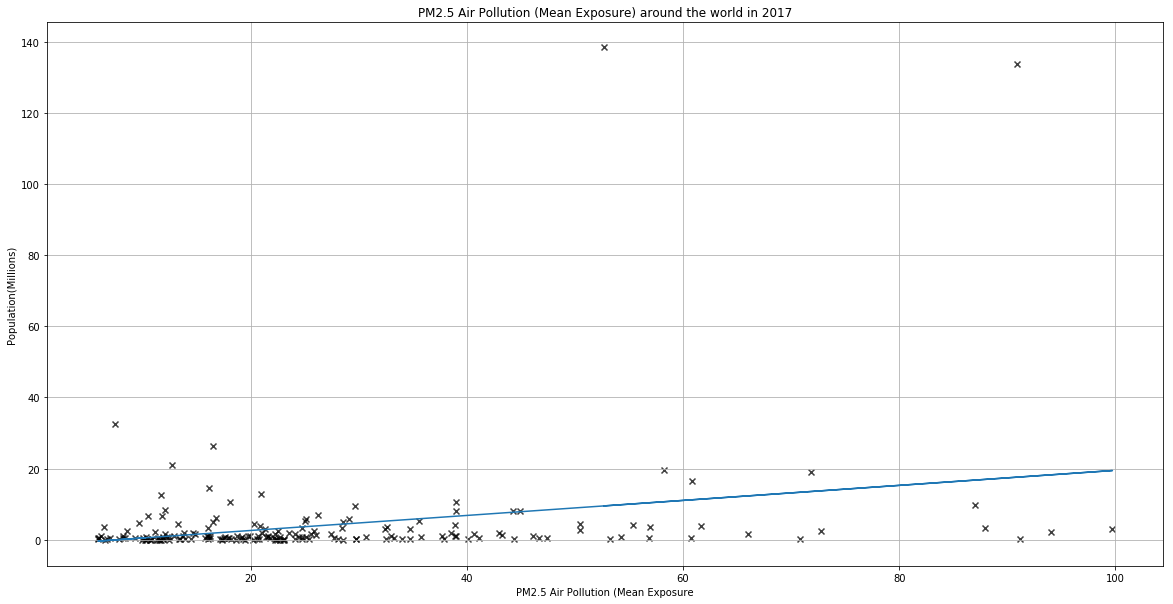

In [19]:
# Population vs pm2.5. 2017 
plt.figure(figsize=(20,10))

y_axis=list(merge_table_sort['2017_population'])
x_axis = np.asarray(list(merge_table_sort['2017_pm25']))

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis,y_axis)
# slope = float(slope)
line = slope * x_axis + intercept


plt.scatter(x_axis, y_axis, marker="x", facecolors="black", edgecolors="black", alpha=0.75)
plt.plot(x_axis, line)
plt.grid()
plt.title("PM2.5 Air Pollution (Mean Exposure) around the world in 2017")
plt.xlabel("PM2.5 Air Pollution (Mean Exposure")
plt.ylabel("Population(Millions)")

plt.savefig("Pictures/population vs pm2.5. 2017.png")
plt.show()

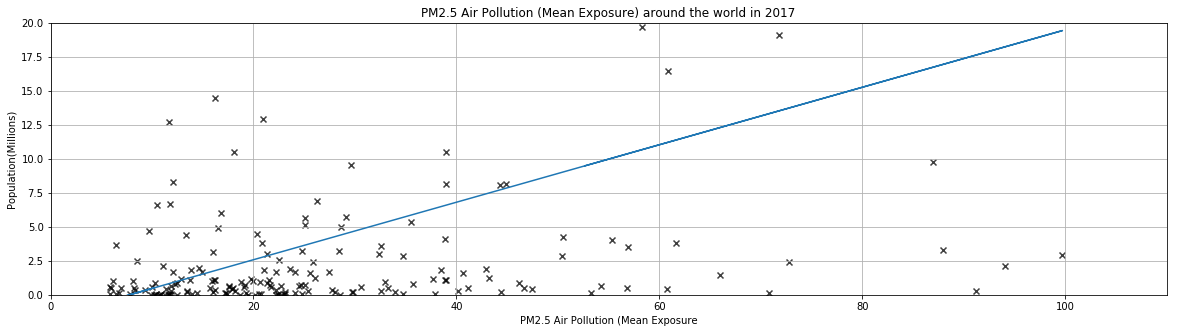

<Figure size 1440x720 with 0 Axes>

In [20]:
# Population vs pm2.5. 2017 - exclude outliers
plt.figure(figsize=(20,5))

y_axis=list(merge_table_sort['2017_population'])
x_axis = np.asarray(list(merge_table_sort['2017_pm25']))

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis,y_axis)
# slope = float(slope)
line = slope * x_axis + intercept


plt.scatter(x_axis, y_axis, marker="x", facecolors="black", edgecolors="black", alpha=0.75)
plt.plot(x_axis, line)
plt.ylim(0, 20)
plt.xlim(0,110)
plt.grid()
plt.title("PM2.5 Air Pollution (Mean Exposure) around the world in 2017")
plt.xlabel("PM2.5 Air Pollution (Mean Exposure")
plt.ylabel("Population(Millions)")
plt.figure(figsize=(20,10))

plt.savefig("Pictures/population vs pm2.5. 2017_exclude outliers.png")
plt.show()

In [21]:
print(slope,intercept)

0.2114583309159362 -1.6472123855173777


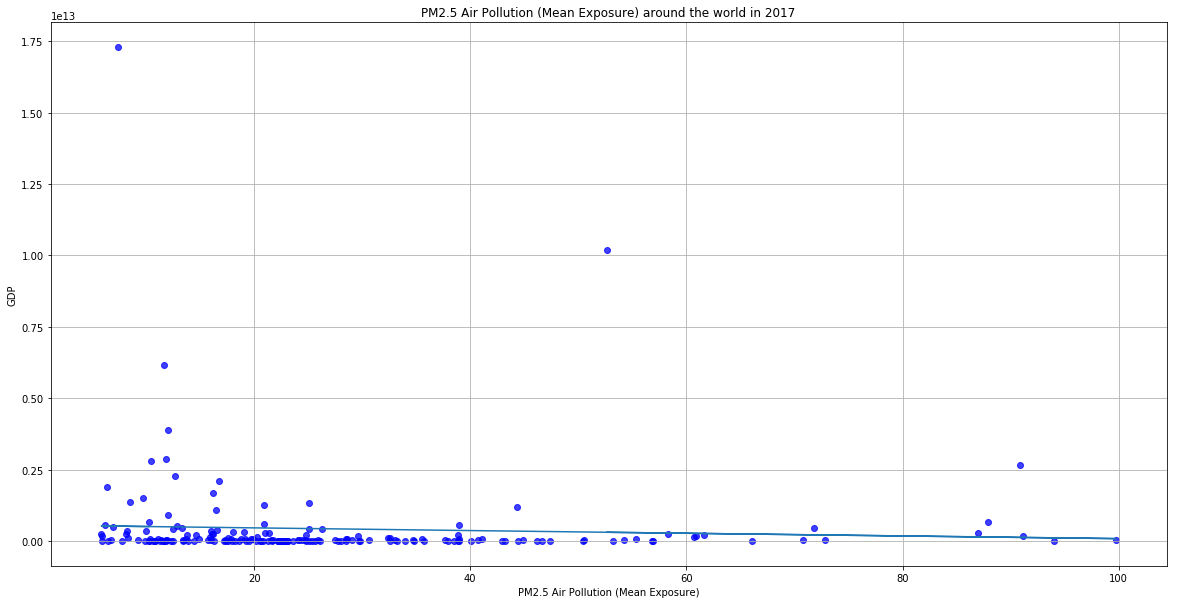

In [22]:
# GDP vs pm2.5. 2017 
plt.figure(figsize=(20,10))
y_axis=list(merge_table_sort['2017_gdp'])
x_axis = np.asarray(list(merge_table_sort['2017_pm25']))

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis,y_axis)
# slope = float(slope)
line = slope * x_axis + intercept

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.75)
plt.plot(x_axis, line)
plt.grid()
plt.title("PM2.5 Air Pollution (Mean Exposure) around the world in 2017")
plt.xlabel("PM2.5 Air Pollution (Mean Exposure)")
plt.ylabel("GDP")

plt.savefig("Pictures/GDP vs pm2.5. 2017.png")
plt.show()

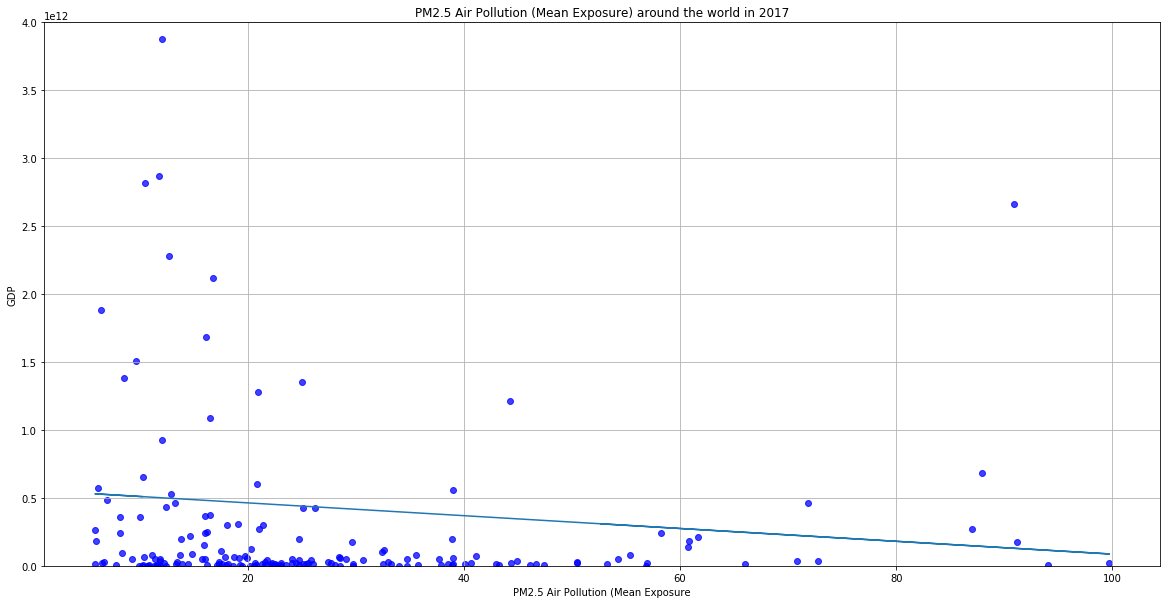

In [23]:
# GDP vs pm2.5. 2017 - exclude outliers
plt.figure(figsize=(20,10))

y_axis=list(merge_table_sort['2017_gdp'])
x_axis = np.asarray(list(merge_table_sort['2017_pm25']))

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis,y_axis)
# slope = float(slope)
line = slope * x_axis + intercept

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.75)
plt.plot(x_axis, line)
plt.ylim(0, 4000000000000)
plt.grid()
plt.title("PM2.5 Air Pollution (Mean Exposure) around the world in 2017")
plt.xlabel("PM2.5 Air Pollution (Mean Exposure")
plt.ylabel("GDP")

plt.savefig("Pictures/GDP vs pm2.5. 2017_exclude outliers.png")
plt.show()

In [24]:
print(slope,intercept)

-4712571558.007672 557320267370.011
